In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from IMNN import IMNN
from IMNN.ABC import ABC, priors
import pandas

In [2]:
print("TensorFlow version =", tf.__version__)
print("IMNN version =", IMNN.__version__)

TensorFlow version = 2.0.0
IMNN version = 0.2a4


# make data

In [42]:
input_shape = (10,)
n_summaries = 2
n_params = 2
n_s = 1000
n_d = 1000
n_d_large = 1000
n_d_small = 100

fiducial = np.array([0., 1.])
delta = np.array([0.1, 0.1])

#drawing from a normal distribution around fiducial
a_0 = np.random.normal(fiducial[0], np.sqrt(fiducial[1]), (n_s,) + input_shape)
a_1 = np.random.normal(fiducial[0], np.sqrt(fiducial[1]), (n_s,) + input_shape)

np.save("data/fiducial_data.npy", a_0)
np.save("data/fiducial_validation_data.npy", a_1)

seed_0 = np.random.randint(1e6)
seed_1 = np.random.randint(1e6)

np.random.seed(seed_0)
b_0 = np.random.normal(fiducial[0] - delta[0], np.sqrt(fiducial[1]), (n_d_large,) + input_shape)
np.random.seed(seed_1)
b_1 = np.random.normal(fiducial[0] - delta[0], np.sqrt(fiducial[1]), (n_d_large,) + input_shape)
np.random.seed(seed_0)
c_0 = np.random.normal(fiducial[0] + delta[0], np.sqrt(fiducial[1]), (n_d_large,) + input_shape)
np.random.seed(seed_1)
c_1 = np.random.normal(fiducial[0] + delta[0], np.sqrt(fiducial[1]), (n_d_large,) + input_shape)
np.random.seed(seed_0)
d_0 = np.random.normal(fiducial[0], np.sqrt(fiducial[1] - delta[1]), (n_d_large,) + input_shape)
np.random.seed(seed_1)
d_1 = np.random.normal(fiducial[0], np.sqrt(fiducial[1] - delta[1]), (n_d_large,) + input_shape)
np.random.seed(seed_0)
e_0 = np.random.normal(fiducial[0], np.sqrt(fiducial[1] + delta[1]), (n_d_large,) + input_shape)
np.random.seed(seed_1)
e_1 = np.random.normal(fiducial[0], np.sqrt(fiducial[1] + delta[1]), (n_d_large,) + input_shape)

f_0 = np.stack((np.stack((b_0, c_0)), np.stack((d_0, e_0)))).transpose(2, 1, 0, 3)
f_1 = np.stack((np.stack((b_1, c_1)), np.stack((d_1, e_1)))).transpose(2, 1, 0, 3)
               
np.save("data/large_derivative_data.npy", f_0)
np.save("data/small_derivative_data.npy", f_0[:n_d_small])
np.save("data/large_derivative_validation_data.npy", f_1)
np.save("data/small_derivative_validation_data.npy", f_1[:n_d_small])

In [28]:
a_0[100]

array([[0.39735007, 3.64858965],
       [1.43847833, 3.12486763],
       [0.33658995, 1.57233341],
       [1.14032614, 3.97308802],
       [0.99866029, 3.98221576],
       [2.31821143, 4.22973283],
       [1.84136769, 3.54420221],
       [1.37036698, 3.77155424],
       [0.4419225 , 1.74013885],
       [1.29588145, 3.11831312]])

In [56]:
#test for circle radius and area

input_shape = (10,2)
n_summaries = 2
n_params = 2
n_s = 1000
n_d = 1000
n_d_large = 1000
n_d_small = 100

fiducial = np.array([1., 3.14])#radius and area of circle
delta = np.array([0.1, 0.659])#for derivatives
variance=1

#In order to sample the observed fidutial and derivative values 
#we will draw from a normal distribution around radius 1 (mean) with variance sigma of also 1

#drawing from a normal distribution around fiducial
a_0_0 = np.random.normal(fiducial[0], np.sqrt(variance), (n_s,) + (10,))
a_0_1 = np.random.normal(fiducial[1], np.sqrt(variance), (n_s,) + (10,))
a_1_0 = np.random.normal(fiducial[0], np.sqrt(variance), (n_s,) + (10,))
a_1_1 = np.random.normal(fiducial[1], np.sqrt(variance), (n_s,) + (10,))
a_0 = np.concatenate([a_0_0[:,np.newaxis], a_0_1[:,np.newaxis]], axis=1).transpose(0, 2, 1)
a_1 = np.concatenate([a_1_0[:,np.newaxis], a_1_1[:,np.newaxis]], axis=1).transpose(0, 2, 1)

np.save("data/fiducial_data.npy", a_0)
np.save("data/fiducial_validation_data.npy", a_1)

seed_0 = np.random.randint(1e6)
seed_1 = np.random.randint(1e6)

np.random.seed(seed_0)
b_0_0 = np.random.normal(fiducial[0] - delta[0], np.sqrt(variance), (n_d_large,) + (10,))
b_0_1 = np.random.normal(fiducial[1] - delta[1], np.sqrt(variance), (n_d_large,) + (10,))
np.random.seed(seed_1)
b_1_0 = np.random.normal(fiducial[0] - delta[0], np.sqrt(variance), (n_d_large,) + (10,))
b_1_1 = np.random.normal(fiducial[1] - delta[1], np.sqrt(variance), (n_d_large,) + (10,))
np.random.seed(seed_0)
c_0_0 = np.random.normal(fiducial[0] + delta[0], np.sqrt(variance), (n_d_large,) + (10,))
c_0_1 = np.random.normal(fiducial[1] + delta[1], np.sqrt(variance), (n_d_large,) + (10,))
np.random.seed(seed_1)
c_1_0 = np.random.normal(fiducial[0] + delta[0], np.sqrt(variance), (n_d_large,) + (10,))
c_1_1 = np.random.normal(fiducial[1] + delta[1], np.sqrt(variance), (n_d_large,) + (10,))
np.random.seed(seed_0)
d_0_0 = np.random.normal(fiducial[0], np.sqrt(variance - delta[0]), (n_d_large,) + (10,))
d_0_1 = np.random.normal(fiducial[1], np.sqrt(variance - delta[1]), (n_d_large,) + (10,))
np.random.seed(seed_1)
d_1_0 = np.random.normal(fiducial[0], np.sqrt(variance - delta[0]), (n_d_large,) + (10,))
d_1_1 = np.random.normal(fiducial[1], np.sqrt(variance - delta[1]), (n_d_large,) + (10,))
np.random.seed(seed_0)
e_0_0 = np.random.normal(fiducial[0], np.sqrt(variance + delta[0]), (n_d_large,) + (10,))
e_0_1 = np.random.normal(fiducial[1], np.sqrt(variance + delta[1]), (n_d_large,) + (10,))
np.random.seed(seed_1)
e_1_0 = np.random.normal(fiducial[0], np.sqrt(variance + delta[0]), (n_d_large,) + (10,))
e_1_1 = np.random.normal(fiducial[1], np.sqrt(variance + delta[1]), (n_d_large,) + (10,))

f_0_0 = np.stack((np.stack((b_0_0, c_0_0)), np.stack((d_0_0, e_0_0)))).transpose(2, 1, 0, 3)
f_1_0 = np.stack((np.stack((b_1_0, c_1_0)), np.stack((d_1_0, e_1_0)))).transpose(2, 1, 0, 3)

f_0_1 = np.stack((np.stack((b_0_1, c_0_1)), np.stack((d_0_1, e_0_1)))).transpose(2, 1, 0, 3)
f_1_1 = np.stack((np.stack((b_1_1, c_1_1)), np.stack((d_1_1, e_1_1)))).transpose(2, 1, 0, 3)

f_0 = np.stack((f_0_0,f_0_1)).transpose(1,2,3,4,0)
f_1 = np.stack((f_1_0,f_1_1)).transpose(1,2,3,4,0)
               
np.save("data/large_derivative_data.npy", f_0)
np.save("data/small_derivative_data.npy", f_0[:n_d_small])
np.save("data/large_derivative_validation_data.npy", f_1)
np.save("data/small_derivative_validation_data.npy", f_1[:n_d_small])

In [58]:
print(np.shape(f_0_0))
print(np.shape(f_0))

(1000, 2, 2, 10)
(1000, 2, 2, 10, 2)


# IMNN

In [59]:
fiducial_data = np.load("data/fiducial_data.npy")
derivative_data = np.load("data/large_derivative_data.npy")
validation_fiducial_data = np.load("data/fiducial_validation_data.npy")
validation_derivative_data = np.load("data/large_derivative_validation_data.npy")

In [60]:
np.shape(fiducial_data)

(1000, 10, 2)

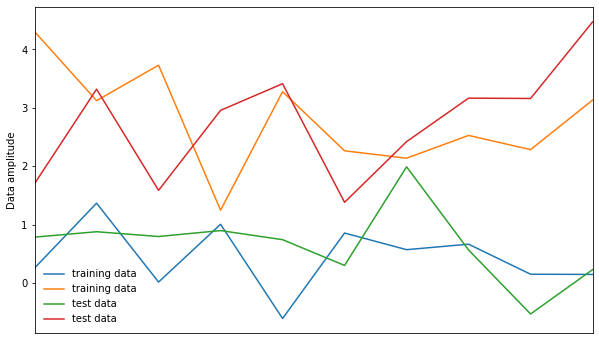

In [61]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.plot(fiducial_data[0], label = "training data")
ax.plot(validation_fiducial_data[0] , label = "test data")
ax.legend(frameon = False)
ax.set_xlim([0, 9])
ax.set_xticks([])
ax.set_ylabel("Data amplitude");

In [62]:
print("n_params =", n_params)
print("n_summaries =", n_summaries)
print("n_s =", n_s)
print("n_d =", n_d)
print("input_shape =", input_shape)
print("θ_fid =", fiducial)
print("δθ =", delta)

n_params = 2
n_summaries = 2
n_s = 1000
n_d = 1000
input_shape = (10, 2)
θ_fid = [1.   3.14]
δθ = [0.1   0.659]


In [63]:
class LeakyReLU(tf.keras.layers.Layer):
    def __init__(self, α, **kwargs):
        self.α = α
        super(LeakyReLU, self).__init__(**kwargs)
    def build(self, input_shape):
        super(LeakyReLU, self).build(input_shape)
    def call(self, x):
        return tf.where(tf.greater(x, 0) , x=x, y=tf.multiply(self.α, x))
    def compute_output_shape(self, input_shape):
        return input_shape

In [69]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape=input_shape),
     tf.keras.layers.Dense(128),
     tf.keras.layers.LeakyReLU(0.01),
     tf.keras.layers.Dense(128),
     tf.keras.layers.LeakyReLU(0.01),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(n_summaries),
    ])
opt = tf.keras.optimizers.Adam()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10, 128)           384       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 10, 128)           0         
_________________________________________________________________
dense_10 (Dense)             (None, 10, 128)           16512     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 10, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 2562      
Total params: 19,458
Trainable params: 19,458
Non-trainable params: 0
__________________________________________________

In [70]:
imnn = IMNN.IMNN(n_s=n_s, n_d=n_d, n_params=n_params, n_summaries=n_summaries, input_shape=input_shape,
                 model=model, optimiser=opt, θ_fid=fiducial, δθ=delta,
                 fiducial_loader=fiducial_data, derivative_loader=derivative_data,
                 validation_fiducial_loader=validation_fiducial_data,
                 validation_derivative_loader=validation_derivative_data,
                 map_fn=None, check_shape=True,
                 verbose=True, filename="model", save=True)

input shape will be (10, 2)
saving model to model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [71]:
imnn.fit(None, λ=10., ϵ=0.01, patience=10, min_iterations=1000)

Using patience length of 10. Maximum number of training iterations is 10000000000.
Saving current model in model
INFO:tensorflow:Assets written to: model/assets


Reached 10 steps without increasing val_det_F. Resetting weights to iteration 6923.


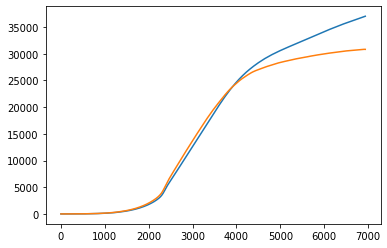

In [72]:
plt.plot(imnn.history["det_F"], label="det_F")
plt.plot(imnn.history["val_det_F"],label="validation det_F")

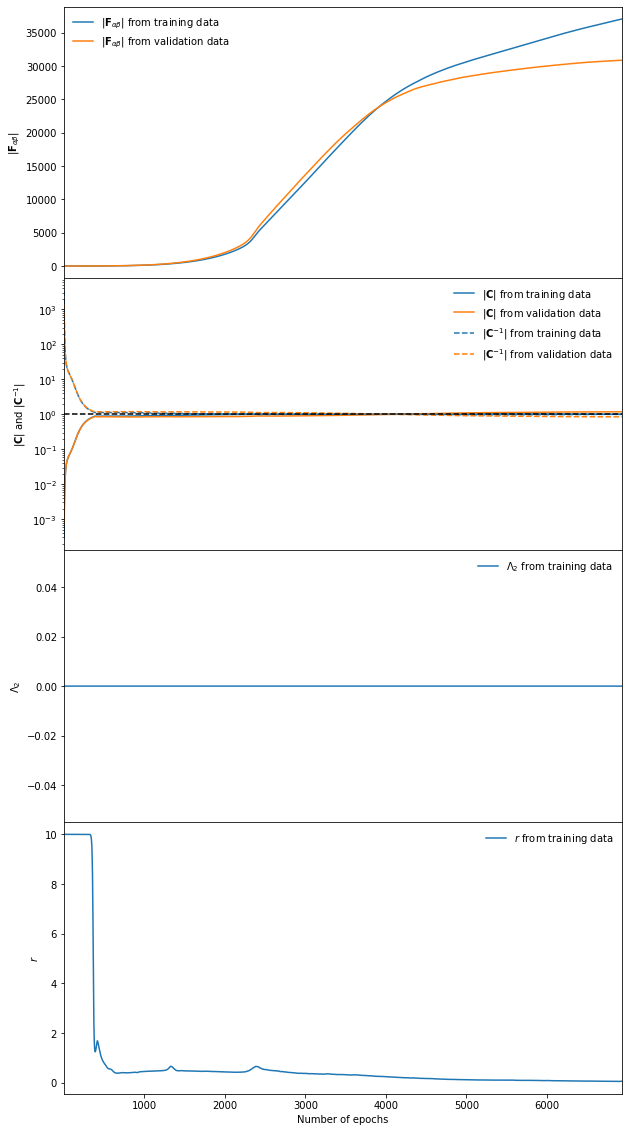

In [73]:
fig, ax = plt.subplots(4, 1, sharex = True, figsize = (10, 20))
plt.subplots_adjust(hspace = 0)
epochs = np.arange(1, len(imnn.history["det_F"]) + 1)
ax[0].plot(epochs, imnn.history["det_F"], color="C0",
           label=r'$|{\bf F}_{\alpha\beta}|$ from training data')
ax[0].plot(epochs, imnn.history["val_det_F"], color="C1",
           label=r'$|{\bf F}_{\alpha\beta}|$ from validation data')
#ax[0].axhline(determinant_exact_fisher, color="black", linestyle="dashed")
ax[0].legend(frameon=False)
ax[0].set_xlim([1, epochs[-1]])
ax[0].set_ylabel(r"$|{\bf F}_{\alpha\beta}|$")
ax[1].plot(epochs, imnn.history["det_C"], color="C0",
           label=r'$|{\bf C}|$ from training data')
ax[1].plot(epochs, imnn.history["val_det_C"], color="C1",
           label=r'$|{\bf C}|$ from validation data')
ax[1].plot(epochs, imnn.history["det_Cinv"], color="C0", linestyle="dashed",
           label=r'$|{\bf C}^{-1}|$ from training data')
ax[1].plot(epochs, imnn.history["val_det_Cinv"], color="C1", linestyle="dashed",
           label=r'$|{\bf C}^{-1}|$ from validation data')
ax[1].axhline(1., color="black", linestyle="dashed")
ax[1].legend(frameon=False, loc="best")
ax[1].set_ylabel(r"$|{\bf C}|$ and $|{\bf C}^{-1}|$")
ax[1].set_xlim([1, epochs[-1]])
ax[1].set_yscale("log")
ax[2].plot(epochs, imnn.history["reg"],
           label=r'$\Lambda_2$ from training data')
#ax[2].plot(epochs, imnn.history["val_reg"],
#           label=r'$\Lambda_2$ from validation data')
ax[2].legend(frameon=False)
ax[2].set_ylabel(r"$\Lambda_2$")
ax[2].set_xlim([1, epochs[-1]])
ax[3].plot(epochs, imnn.history["r"], 
           label=r'$r$ from training data')
#ax[3].plot(epochs, imnn.history["val_r"], 
#           label=r'$r$ from validation data')
ax[3].legend(frameon=False)
ax[3].set_ylabel(r"$r$")
ax[3].set_xlim([1, epochs[-1]])
ax[3].set_xlabel("Number of epochs");

# ABC

In [76]:
from IMNN.ABC import ABC, priors

In [78]:
imnn.setup_MLE()

AttributeError: 'IMNN' object has no attribute 'setup_MLE'

In [77]:
prior = priors.TruncatedGaussian(np.array([0., 1.]), np.array([[10., 0.], [0., 10.]]), np.array([-10., 0.]), np.array([10., 10.]))

In [ ]:
abc = ABC.ABC(real_data=real_data, prior=prior, F=imnn.MLE_F, get_MLE=imnn.get_MLE, simulator=simulator, seed=None, simulator_args={"input shape": input_shape})

In [75]:
abc.PMC(draws=2000, posterior=2000, criterion=0.01, at_once=True, save_sims=None) 

NameError: name 'abc' is not defined